### Super-Resolution Convolutional Neural Network 

In [9]:
import os
import cv2
import h5py
import math
import numpy
import matplotlib.pyplot as plt
import tensorflow as tf
import time
%run "../lib/SRCNN/main_SRCNN_prepare_data.py" #import functions for prepare data
%run "../lib/SRCNN/main_SRCNN_train_predict.py" #import train and predict model

### Feature and Label Construction

#### Please make sure you have the following directories with  trianing LR HR images and testing LR HR images along with our entire folder!

In [13]:
#Set train data directories
train_LR_dir = "../data/train_set/LR/"
train_HR_dir = "../data/train_set/HR/"
LR_dir_name = os.listdir(train_LR_dir)
HR_dir_name = os.listdir(train_HR_dir)

#Set test data directories
test_lr_dir = "../data/test_set/LR/"
test_super_dir = "../data/test_set/SR-I/"
test_hr_dir = "../data/test_set/HR/"
test_lr_name = os.listdir(test_lr_dir)
n_test_files = len(test_lr_name)

#weight path
weight_path = "../lib/SRCNN/YCrCb_entire_weight.h5"

#initial values
n_files = len(LR_dir_name)
Random_Crop =30 #number of sample patches
Patch_size = 33 
learn_rate = 0.0003

In [11]:
#RGB_feature , RGB_label , RGB_feature_time= feature_RGB(n_files,Random_Crop,Patch_size,train_LR_dir,train_HR_dir,LR_dir_name,HR_dir_name)

In [5]:
YCrCb_feature , YCrCb_label , YCrCb_feature_time = feature_YCrCb(n_files,Random_Crop,Patch_size,train_LR_dir,train_HR_dir,LR_dir_name,HR_dir_name)

In [6]:
YCrCb_feature.shape

(45000, 33, 33, 3)

In [7]:
YCrCb_label.shape

(45000, 33, 33, 3)

In [129]:
#Y_feature , Y_label , Y_feature_time = feature_Y_color(n_files,Random_Crop,Patch_size,train_LR_dir,train_HR_dir,LR_dir_name,HR_dir_name)

In [ ]:
#Save train feature h5py file
#write_h5py(RGB_feature,RGB_label,"../lib/RGB_feature.h5")
#write_h5py(YCrCb_feature,YCrCb_label,"../lib/YCrCb_feature.h5")
#write_h5py(Y_feature,Y_label,"../lib/Y_feature.h5")

### Train Images on three color channel with validation split

In [ ]:
#RGB_feature,RGB_label =  read_training_data("../lib/RGB_feature.h5") 
#YCrCb_feature,YCrCb_label =  read_training_data("../lib/YCrCb_feature.h5") 
#Y_feature,Y_label =  read_training_data("../lib/Y_feature.h5") 

#### Training RGB channel

In [156]:
#RGB_model = train_model(n1=64,n2=32,n3=3,k1=9,k2=1,k3=5, Patch_size=Patch_size,learn_rate=learn_rate,channel=3)

In [157]:
#print(RGB_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 33, 33, 64)        15616     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 33, 33, 32)        2080      
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 33, 33, 3)         2403      
Total params: 20,099
Trainable params: 20,099
Non-trainable params: 0
_________________________________________________________________
None


In [158]:
#RGB_train,RGB_train_time = training(RGB_feature,RGB_label,RGB_model,batch=128,epoch=100)

Train on 36000 samples, validate on 9000 samples
Epoch 1/100
36000/36000 [==============================] - 7s 184us/step - loss: 0.0140 - val_loss: 0.0062
Epoch 2/100
36000/36000 [==============================] - 5s 150us/step - loss: 0.0036 - val_loss: 0.0051
Epoch 3/100
36000/36000 [==============================] - 5s 150us/step - loss: 0.0032 - val_loss: 0.0048
Epoch 4/100
36000/36000 [==============================] - 5s 149us/step - loss: 0.0030 - val_loss: 0.0046
Epoch 5/100
36000/36000 [==============================] - 5s 148us/step - loss: 0.0029 - val_loss: 0.0045
Epoch 6/100
36000/36000 [==============================] - 5s 150us/step - loss: 0.0028 - val_loss: 0.0045
Epoch 7/100
36000/36000 [==============================] - 5s 149us/step - loss: 0.0028 - val_loss: 0.0044
Epoch 8/100
36000/36000 [==============================] - 5s 149us/step - loss: 0.0028 - val_loss: 0.0049
Epoch 9/100
36000/36000 [==============================] - 5s 149us/step - loss: 0.0027 - val_l

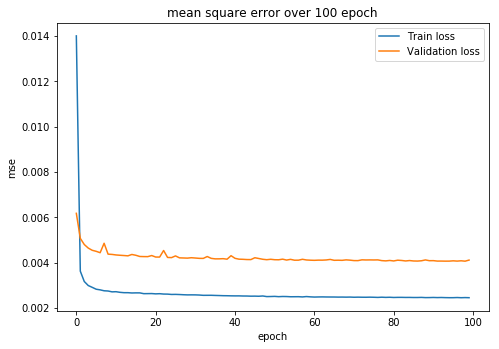

In [268]:
#show_error(RGB_train,valid=True)

In [206]:
#show_psnr(RGB_train,valid=True)

Training mse: 0.0024530321784938377   psnr : 26.102967547489143
Validation mse: 0.004112832445444332 psnr : 23.85858983051289 


#### Training  YCrCb channel

In [161]:
#YCrCb_model = train_model(n1=64,n2=32,n3=3,k1=9,k2=1,k3=5, Patch_size=Patch_size,learn_rate=learn_rate,channel=3)

In [162]:
#print(YCrCb_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 33, 33, 64)        15616     
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 33, 33, 32)        2080      
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 33, 33, 3)         2403      
Total params: 20,099
Trainable params: 20,099
Non-trainable params: 0
_________________________________________________________________
None


In [163]:
#YCrCb_train , YCrCb_train_time = training(YCrCb_feature,YCrCb_label,YCrCb_model,batch=128,epoch=100)

Train on 36000 samples, validate on 9000 samples
Epoch 1/100
36000/36000 [==============================] - 6s 163us/step - loss: 0.0178 - val_loss: 0.0032
Epoch 2/100
36000/36000 [==============================] - 5s 144us/step - loss: 0.0018 - val_loss: 0.0022
Epoch 3/100
36000/36000 [==============================] - 5s 144us/step - loss: 0.0013 - val_loss: 0.0019
Epoch 4/100
36000/36000 [==============================] - 5s 144us/step - loss: 0.0012 - val_loss: 0.0018
Epoch 5/100
36000/36000 [==============================] - 5s 144us/step - loss: 0.0011 - val_loss: 0.0017
Epoch 6/100
36000/36000 [==============================] - 5s 144us/step - loss: 0.0011 - val_loss: 0.0016
Epoch 7/100
36000/36000 [==============================] - 5s 145us/step - loss: 0.0010 - val_loss: 0.0016
Epoch 8/100
36000/36000 [==============================] - 5s 144us/step - loss: 0.0010 - val_loss: 0.0017
Epoch 9/100
36000/36000 [==============================] - 5s 144us/step - loss: 9.9608e-04 - v

36000/36000 [==============================] - 5s 144us/step - loss: 8.8334e-04 - val_loss: 0.0015
Epoch 75/100
36000/36000 [==============================] - 5s 147us/step - loss: 8.8423e-04 - val_loss: 0.0014
Epoch 76/100
36000/36000 [==============================] - 5s 146us/step - loss: 8.8210e-04 - val_loss: 0.0014
Epoch 77/100
36000/36000 [==============================] - 5s 146us/step - loss: 8.8194e-04 - val_loss: 0.0014
Epoch 78/100
36000/36000 [==============================] - 5s 147us/step - loss: 8.8202e-04 - val_loss: 0.0015
Epoch 79/100
36000/36000 [==============================] - 5s 147us/step - loss: 8.8233e-04 - val_loss: 0.0014
Epoch 80/100
36000/36000 [==============================] - 5s 147us/step - loss: 8.8153e-04 - val_loss: 0.0014
Epoch 81/100
36000/36000 [==============================] - 5s 148us/step - loss: 8.8090e-04 - val_loss: 0.0015
Epoch 82/100
36000/36000 [==============================] - 5s 147us/step - loss: 8.8066e-04 - val_loss: 0.0014
Epoch

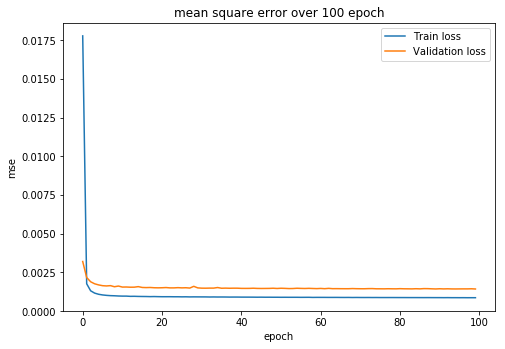

In [269]:
#show_error(YCrCb_train,valid=True)

In [207]:
#show_psnr(YCrCb_train,valid=True)

Training mse: 0.0008714968221676018   psnr : 30.597341921656817
Validation mse: 0.0014337077744615574 psnr : 28.43539359736457 


#### Training only Y color channel

In [166]:
#Y_model = train_model(n1=64,n2=32,n3=1,k1=9,k2=1,k3=5, Patch_size=Patch_size,learn_rate=learn_rate,channel=1)

In [133]:
#print(Y_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 33, 33, 64)        5248      
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 33, 33, 32)        2080      
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 33, 33, 1)         801       
Total params: 8,129
Trainable params: 8,129
Non-trainable params: 0
_________________________________________________________________
None


In [167]:
#Y_train , Y_train_time = training(Y_feature,Y_label,Y_model,batch=128,epoch=100)

Train on 36000 samples, validate on 9000 samples
Epoch 1/100
36000/36000 [==============================] - 4s 124us/step - loss: 0.0113 - val_loss: 0.0048
Epoch 2/100
36000/36000 [==============================] - 4s 102us/step - loss: 0.0028 - val_loss: 0.0043
Epoch 3/100
36000/36000 [==============================] - 4s 102us/step - loss: 0.0026 - val_loss: 0.0041
Epoch 4/100
36000/36000 [==============================] - 4s 106us/step - loss: 0.0025 - val_loss: 0.0040
Epoch 5/100
36000/36000 [==============================] - 4s 104us/step - loss: 0.0024 - val_loss: 0.0039
Epoch 6/100
36000/36000 [==============================] - 4s 104us/step - loss: 0.0024 - val_loss: 0.0038
Epoch 7/100
36000/36000 [==============================] - 4s 103us/step - loss: 0.0023 - val_loss: 0.0038
Epoch 8/100
36000/36000 [==============================] - 4s 103us/step - loss: 0.0023 - val_loss: 0.0038
Epoch 9/100
36000/36000 [==============================] - 4s 104us/step - loss: 0.0023 - val_l

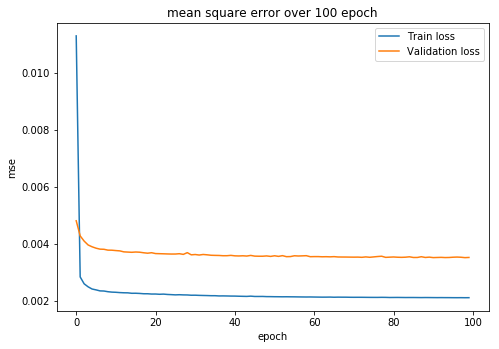

In [270]:
#show_error(Y_train,valid=True)

In [204]:
#show_psnr(Y_train,valid=True)

Training mse: 0.0021034414246678354   psnr : 26.770695774419625
Validation mse: 0.003515105029154155 psnr : 24.540616940010196 


### Train images on YCrCb color channel with entire training set

In [170]:
YCrCb_model_entire = train_model(n1=64,n2=32,n3=3,k1=9,k2=1,k3=5, Patch_size=Patch_size,learn_rate=learn_rate,channel=3)

In [172]:
train_start_time = time.time()
YCrCb_train_entire = YCrCb_model_entire.fit(YCrCb_feature,YCrCb_label,batch_size=128,epochs=100)
train_entire_time =  time.time() - train_start_time

Epoch 1/100
45000/45000 [==============================] - 6s 141us/step - loss: 0.0092
Epoch 2/100
45000/45000 [==============================] - 6s 130us/step - loss: 0.0016
Epoch 3/100
45000/45000 [==============================] - 6s 129us/step - loss: 0.0013
Epoch 4/100
45000/45000 [==============================] - 6s 131us/step - loss: 0.0012
Epoch 5/100
45000/45000 [==============================] - 6s 127us/step - loss: 0.0012
Epoch 6/100
45000/45000 [==============================] - 6s 127us/step - loss: 0.0011
Epoch 7/100
45000/45000 [==============================] - 6s 129us/step - loss: 0.0011 0s
Epoch 8/100
45000/45000 [==============================] - 6s 129us/step - loss: 0.0011
Epoch 9/100
45000/45000 [==============================] - 6s 133us/step - loss: 0.0011
Epoch 10/100
45000/45000 [==============================] - 6s 130us/step - loss: 0.0011
Epoch 11/100
45000/45000 [==============================] - 6s 130us/step - loss: 0.0011
Epoch 12/100
45000/45000 [=

45000/45000 [==============================] - 6s 128us/step - loss: 9.8687e-04
Epoch 93/100
45000/45000 [==============================] - 6s 129us/step - loss: 9.8626e-04
Epoch 94/100
45000/45000 [==============================] - 6s 130us/step - loss: 9.8632e-04 0s - loss: 9.8556e-0
Epoch 95/100
45000/45000 [==============================] - 6s 128us/step - loss: 9.8561e-04
Epoch 96/100
45000/45000 [==============================] - 6s 128us/step - loss: 9.8639e-04
Epoch 97/100
45000/45000 [==============================] - 6s 129us/step - loss: 9.8459e-04
Epoch 98/100
45000/45000 [==============================] - 6s 128us/step - loss: 9.8556e-04
Epoch 99/100
45000/45000 [==============================] - 6s 129us/step - loss: 9.8391e-04
Epoch 100/100
45000/45000 [==============================] - 6s 130us/step - loss: 9.8564e-04


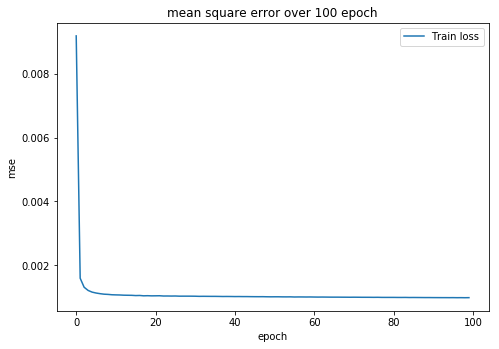

In [271]:
show_error(YCrCb_train_entire,valid=False)

In [203]:
show_psnr(YCrCb_train_entire,valid=False)

Training mse: 0.000985644418704841   psnr : 30.06279732976197



In [218]:
#Save weights
#save_weight(RGB_model,"../lib/RGB_weight.h5")
#save_weight(YCrCb_model,"../lib/YCrCb_weight.h5")
#save_weight(Y_model,"../lib/Y_weight.h5")
save_weight(YCrCb_model_entire,weight_path)

### Predict Images

In [9]:
#Load model and weights
SRCNN_pred= predict_model(n1=64,n2=32,n3=3,k1=9,k2=1,k3=5,learn_rate=learn_rate,channel=3)
SRCNN_pred.load_weights(weight_path)

In [10]:
predict_time = predicting(SRCNN_pred,n_test_files,test_lr_dir,test_hr_dir,test_lr_name,test_super_dir,scale=2)

### Summarize Running Time

In [11]:
print('Feature and label construction time : {} sec'.format(YCrCb_feature_time))

Feature and label construction time : 25.709649562835693 sec


In [244]:
#Training time recorded by using gpu-gtx1070
print('Training time : {} sec'.format(YCrCb_train_time))

Training time : 528.7112383842468 sec


In [ ]:
print('writing SR images time : {} sec'.format(predict_time))

In [13]:
PSNR = []
for i in range(n_test_files):
    SR = cv2.imread(os.path.join(test_super_dir,test_lr_name[i]))
    HR = cv2.imread(os.path.join(test_hr_dir,test_lr_name[i]))
    PSNR.append(get_psnr(HR,SR))

In [ ]:
print('Testing data average psnr: {} '.format(numpy.mean(PSNR)))

### References
https://github.com/MarkPrecursor/SRCNN-keras

https://github.com/tegg89/SRCNN-Tensorflow

Dong, C., Loy, C. C., He, K., & Tang, X. (2016). Image super-resolution using deep convolutional networks. IEEE transactions on pattern analysis and machine intelligence, 38(2), 295-307.https://arxiv.org/pdf/1501.00092.pdf